## Predicting House Value of California Home

## Work Flow - 
Get Data 

Data pre processing 

Data analysis

Evaluation

XGBoost Regressor 

 Train Test Split

In [38]:
! pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

#### Importing the California House Price Dataset

In [40]:
ca_house_price_dataset = sklearn.datasets.fetch_california_housing()
print(ca_house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [41]:
# Loading the dataset to a Pandas DataFrame
ca_house_price_dataframe = pd.DataFrame(ca_house_price_dataset.data, columns = ca_house_price_dataset.feature_names)

In [42]:
ca_house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [43]:
# Add target column to DataFrame
ca_house_price_dataframe['MedHouseVal'] = ca_house_price_dataset.target

In [44]:
ca_house_price_dataframe.shape

(20640, 9)

In [45]:
ca_house_price_dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [46]:
# Checking the number of rows and column in the dataframe

ca_house_price_dataframe.shape

(20640, 9)

In [47]:
# Check for missing values
ca_house_price_dataframe.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [48]:
# Statistical measures of the dataset
ca_house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


 ### Understanding the correlation between the dataset
 Positive correlation

 Negative correlation

In [49]:
correlation = ca_house_price_dataframe.corr()

<Axes: >

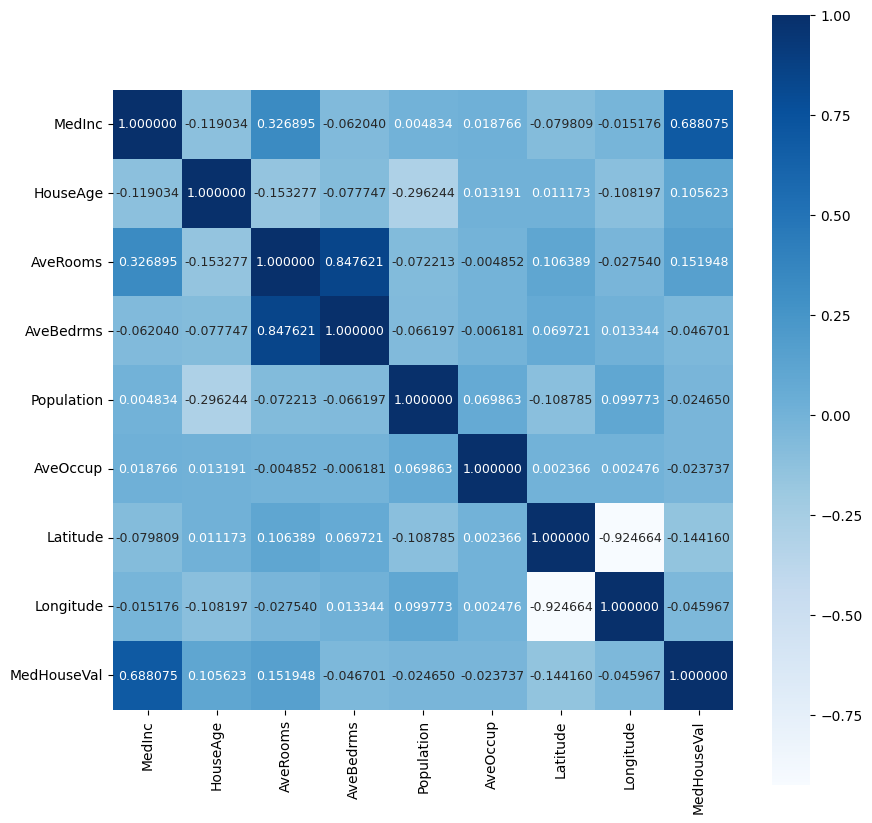

In [50]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar =True, square =True, fmt = '1f', annot=True, annot_kws={'size':9}, cmap='Blues')

### Splitting the data and target

In [56]:
X = ca_house_price_dataframe.drop(['MedHouseVal'], axis = 1)
Y = ca_house_price_dataframe['MedHouseVal']
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude   
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88  \
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

### Splitting the data to training data and test data

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

In [62]:
# Loading the model
model = XGBRegressor()

In [63]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation -
For XGBRegressor, we can't use an accuracy score - There's a different way to find the accuracy.

We find it by finding the R-squared and Mean Absolute Error

Prediction on Training Model

In [64]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [71]:
training_data_prediction

array([0.5523039, 3.0850039, 0.5835302, ..., 1.9204227, 1.952873 ,
       0.6768683], dtype=float32)

In [77]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R squared error: ', score_1)
print('Mean Absolute Error: ', score_2)

R squared error:  0.943650140819218
Mean Absolute Error:  0.1933648700612105


The R-squared (R²) value, also known as the coefficient of determination, is a statistical measure that indicates how well the regression predictions approximate the real data points. It ranges from 0 to 1, with higher values indicating better fit. However, what constitutes a "good" R-squared value depends on the specific context and the field of study.

## Understanding R-squared Values
R² = 0: The model does not explain any of the variability of the response data around its mean.
R² = 1: The model explains all the variability of the response data around its mean.
0 < R² < 1: The model explains a proportion of the variability.\


## General Guidelines for R-squared Values
High R-squared (0.75 - 1): Indicates a strong correlation and that the model explains a large portion of the variance. This is often expected in physical sciences where the relationships between variables are more deterministic.

Moderate R-squared (0.50 - 0.75): Indicates a moderate correlation and that the model explains a reasonable amount of variance. This might be acceptable in social sciences where the relationships between variables can be more complex and less predictable.

Low R-squared (0.30 - 0.50): Indicates a weak correlation and that the model does not explain a large portion of the variance. This might still be acceptable in fields where many unaccounted-for variables influence the outcome, such as in certain biological or economic models.

Very Low R-squared (0 - 0.30): Indicates a very weak correlation. This suggests that the model is not capturing much of the variability in the data and might not be a good predictor.

## Factors Influencing the Interpretation of R-squared

Field of Study: Different fields have different standards. For example, in psychology or sociology, an R-squared value around 0.30 might be considered very good, whereas in engineering, you might expect R-squared values to be closer to 0.90.
Complexity of the Model: A higher R-squared value doesn't always mean a better model. Overfitting can occur when the model is too complex, capturing noise instead of the underlying pattern.

Purpose of the Model: For predictive modeling, a high R-squared is desirable. For exploratory research or identifying potential predictors, a lower R-squared might be acceptable.

Adjusted R-squared: It is often more useful than R-squared as it adjusts for the number of predictors in the model. This can prevent overestimation of the goodness of fit in models with many variables.

## Conclusion
A "good" R-squared value is context-dependent:

In controlled experiments with few sources of variability, you might expect R-squared values closer to 1.
In observational studies with many confounding variables, lower R-squared values might be the norm.
Always consider the context, field standards, and purpose of your model when evaluating the goodness of fit using R-squared.

The Mean Absolute Error (MAE) is a measure of prediction accuracy in regression models, representing the average absolute difference between predicted and actual values. Like any metric, what constitutes a "good" MAE depends on the context of the problem, the scale of the data, and the field of study.

## Factors Influencing Interpretation of MAE

Scale of Data: The MAE value is in the same unit as the data being predicted. For example, in a dataset where values range from 1 to 1000, an MAE of 10 might be excellent. In contrast, for a dataset where values range from 1 to 10, an MAE of 10 would be very poor.

Field of Study: Different fields have different standards. For example:

    Finance: Small errors might be critical, so a lower MAE is desirable.

    Weather Forecasting: Slightly larger errors might be acceptable given the inherent uncertainty.

    Medical Diagnosis: The tolerance for error might be very low.

Comparative Performance: The MAE should be compared to the MAE of other models on the same dataset. A "good" MAE is often relative and should be seen in comparison with other benchmarks or existing models.
Baseline Models: Comparing the MAE against a baseline model (e.g., mean prediction) can give insight into the performance. If your model's MAE is significantly lower than that of the baseline, it is considered good.

## Guidelines for Good MAE

Context-Dependent Benchmarks: A good practice is to look at industry standards or literature for benchmarks specific to your field.

Relative Improvement: Consider the relative improvement over simpler models or previous models. An MAE reduction by a significant percentage can be considered good.

Data Characteristics: Understand the distribution and variance in your data. A model performing well on high variance data with a low MAE is noteworthy.

## Examples

### House Price Prediction:

    Dataset range: $100,000 to $1,000,000.

    A good MAE might be $10,000 or lower.

### Stock Price Prediction:
    
    Daily price range: $100 to $200.
    
    A good MAE might be $1 to $5.
    
### Temperature Prediction:
    
    Daily temperature range: -30°C to 50°C.

    A good MAE might be 1°C to 2°C.

## Conclusion

A "good" MAE is highly context-specific:

Consider the scale and range of your data.

Look at industry benchmarks and standards.

Compare against baseline models and relative improvements.

Evaluate the MAE in the context of the specific application and tolerance for errors.

Always interpret MAE within the broader context of your predictive task and field-specific requirements.

# Now we need to run the accuracy on the testing data

In [79]:
testing_data_prediction = model.predict(X_test)

In [80]:
# R Squared Error
score_1_test = metrics.r2_score(Y_test, testing_data_prediction)

# Mean Absolute Error
score_2_test = metrics.mean_absolute_error(Y_test, testing_data_prediction)

print('R squared error: ', score_1_test)
print('Mean Absolute Error: ', score_2_test)

R squared error:  0.8338000331788725
Mean Absolute Error:  0.3108631800268186


The Rsquare error is lower than the training data. This means that the test data does not represent as strong a correlation as the training data and the data explains less portion of the variance compared to the training data. 

The MAE is also higher than the training data but still pretty good because our data range from 0 to 10

## Now we create a scatter splot to visualize the data

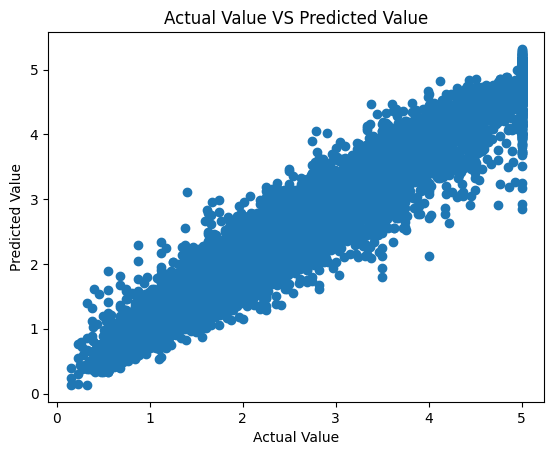

In [81]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value VS Predicted Value")
plt.show()

The predicted model and the actual are very close. As the actual price goes up (X axis), so does the predicted price (Y-Axis)